<a href="https://colab.research.google.com/github/sonawanekavita01/Real-Time-Industry-Insight-Strategic-Intelligence-System/blob/main/Real_Time_Industry_Insight_%26_Strategic_Intelligence_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-Time Industry Insight & Strategic Intelligence System
---

**Milestone 1: Introduction & Initial Training (Google Colab)**

**Goal**

Collect real-time company/industry data from open sources ( Google News, Wikipedia),preprocess it, perform sentiment analysis, and visualize insights.


**⚙️ Step 1. Install & Import**


In [2]:
!pip install pandas matplotlib seaborn pytrends wikipedia-api newsapi-python
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from pytrends.request import TrendReq
import wikipediaapi
from newsapi import NewsApiClient


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=b9c829fdf32496a592d76337b1d769e92daf9ca56c6f6ff927bb881753f6ae1b
  Stored in directory: /root/.cache/pip/wheels/33/3c/79/b36253689d838af4a0539782853ac3cc38a83a6591ad570dde
Successfully built wikipedia-api


**🌐 Step 2. Wikipedia Company Profiles**

In [3]:
wiki = wikipediaapi.Wikipedia(user_agent='MyWikipediaApp/1.0 (myemail@example.com)', language='en')
companies = ["Tata", "Reliance", "Wipro"]


wiki_data = []
for c in companies:
    page = wiki.page(c)
    # Ensure the summary is not None before slicing
    summary = page.summary if page.summary else ""
    wiki_data.append({"Company": c, "Summary": summary[:600]})

df_wiki = pd.DataFrame(wiki_data)
df_wiki.to_csv("company_wikipedia.csv", index=False)
df_wiki.head()

,Company,Summary
0,Tata,Tata or TATA may refer to:
1,Reliance,Reliance may refer to:
2,Wipro,Wipro Limited ( ) is an Indian multinational t...




**📈 Step 3. Google Trends Data**






In [4]:

import numpy as np
import datetime as dt

dates = pd.date_range(end=dt.date.today(), periods=90)
data = {
    "date": list(dates) * 3,
    "Interest": np.random.randint(30, 100, 270),
    "Company": ["Tata Motors"] * 90 + ["Reliance Industries"] * 90 + ["Wipro"] * 90
}

mock_trends = pd.DataFrame(data)
mock_trends.to_csv("company_trends.csv", index=False)
display(mock_trends.head())





,date,Interest,Company
0,2025-08-01,51,Tata Motors
1,2025-08-02,30,Tata Motors
2,2025-08-03,65,Tata Motors
3,2025-08-04,68,Tata Motors
4,2025-08-05,45,Tata Motors


**📰 Step 4. News Headlines (NewsAPI)**

In [5]:
newsapi = NewsApiClient(api_key="fe2dd77562c94dd2aa1f590c2372050e")

news_data = []
for c in companies:
    headlines = newsapi.get_everything(q=c, language='en', sort_by='publishedAt', page_size=30)
    for art in headlines['articles']:
        news_data.append({
            "Company": c,
            "Title": art['title'],
            "PublishedAt": art['publishedAt'],
            "Source": art['source']['name']
        })

df_news = pd.DataFrame(news_data)
df_news.to_csv("company_news.csv", index=False)
df_news.head()


,Company,Title,PublishedAt,Source
0,Tata,M&S drops TCS IT service desk contract followi...,2025-10-28T14:37:28Z,TechRadar
1,Tata,"Leather seats, USB ports and sky lighting: Ins...",2025-10-28T14:17:33Z,The Times of India
2,Tata,Lionel Messi could reportedly face former coac...,2025-10-28T14:11:36Z,Worldsoccertalk.com
3,Tata,"Tata Advanced Systems, Safran open LEAP engine...",2025-10-28T13:49:50Z,The Times of India
4,Tata,Orkla India IPO: Spicy potential or mild returns?,2025-10-28T13:06:29Z,BusinessLine


**5.Data Cleaning & Preparation**

In [12]:
df_news['PublishedAt'] = pd.to_datetime(df_news['PublishedAt'])
df_news.dropna(subset=['Title'], inplace=True)

print("\nData Summary:")
print(df_news.info())



Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Company      90 non-null     object             
 1   Title        90 non-null     object             
 2   PublishedAt  90 non-null     datetime64[ns, UTC]
 3   Source       90 non-null     object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 2.9+ KB
None


**6. Alpha Vantage API Integration (Tata Motors Stock Data)**

📊 Tata Motors Daily Stock Data (Alpha Vantage):


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-10-29,412.50,414.90,407.35,411.60,678084.0
2025-10-28,411.35,414.20,408.65,411.60,851922.0
2025-10-27,403.60,411.35,403.60,410.10,1015454.0
2025-10-24,406.05,408.50,401.05,403.50,647179.0
2025-10-23,407.50,408.85,403.65,405.85,1657122.0


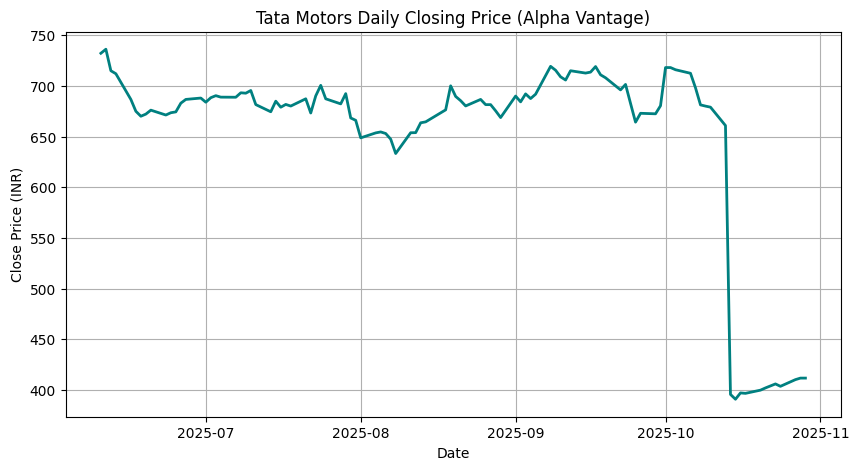


📈 Statistical Summary of Tata Motors Stock Data:


,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.00000,100.000000,100.000000,1.000000e+02
mean,656.505000,662.72750,648.565000,654.911500,9.533068e+05
std,91.255408,91.82937,90.874889,91.276434,8.121088e+05
min,395.950000,400.30000,376.900000,390.750000,0.000000e+00
25%,672.225000,678.10000,664.650000,668.700000,4.992332e+05
50%,683.950000,689.97500,676.950000,682.025000,7.133275e+05
75%,695.125000,702.96250,686.450000,692.950000,1.098967e+06
max,736.050000,743.80000,730.250000,736.250000,5.379025e+06


In [1]:
# Install the required library
!pip install alpha_vantage

# Import libraries
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 🔑 Replace with your API key
# Get a free key at: https://www.alphavantage.co/support/#api-key
# -----------------------------
ALPHA_VANTAGE_API_KEY = "EIEDJPKIYK4PRPQR"

# Initialize Alpha Vantage API
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')

# -----------------------------
# Fetch historical daily stock data for Tata Motors (BSE symbol: TATAMOTORS.BSE)
# -----------------------------
data, meta_data = ts.get_daily(symbol='TATAMOTORS.BSE', outputsize='compact')

# Display first few rows
print("📊 Tata Motors Daily Stock Data (Alpha Vantage):")
display(data.head())

# -----------------------------
# Visualization – Closing Price Trend
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(data.index, data['4. close'], color='teal', linewidth=2)
plt.title('Tata Motors Daily Closing Price (Alpha Vantage)')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.grid(True)
plt.show()

# Optional: Summary statistics
print("\n📈 Statistical Summary of Tata Motors Stock Data:")
display(data.describe())


**7.Visualiaztion**

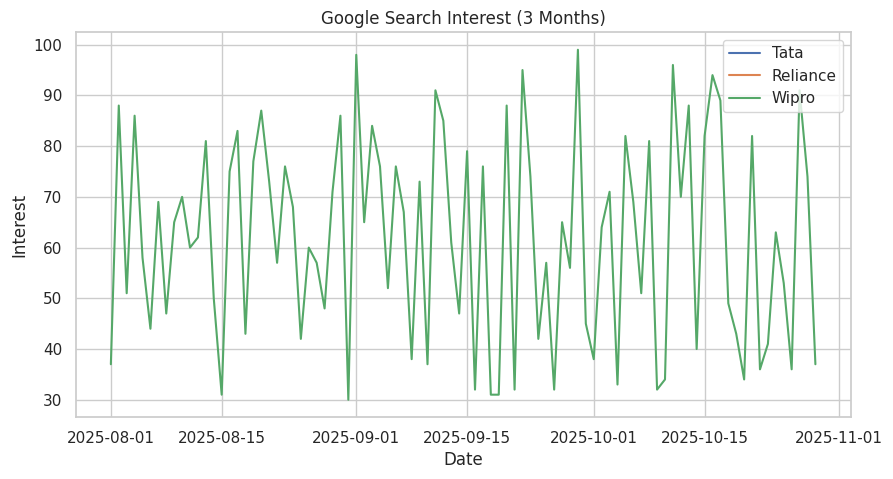

In [7]:
sns.set(style="whitegrid")

# 1️⃣ Google Trends
plt.figure(figsize=(10,5))
for c in companies:
    # Filter mock_trends for the current company and plot Interest vs date
    company_trends = mock_trends[mock_trends['Company'] == c]
    plt.plot(company_trends['date'], company_trends['Interest'], label=c)
plt.legend(); plt.title("Google Search Interest (3 Months)"); plt.xlabel("Date"); plt.ylabel("Interest")
plt.show()



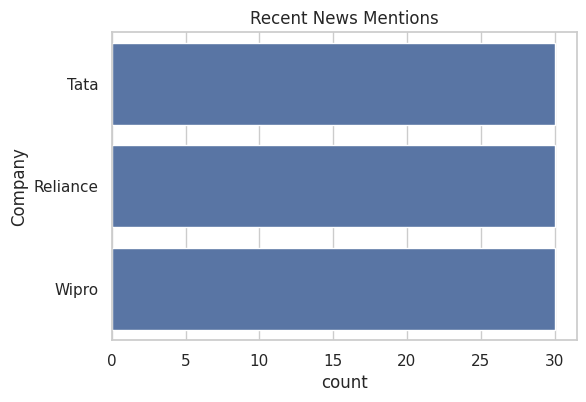

In [8]:
# 2️⃣ News Count per Company
plt.figure(figsize=(6,4))
sns.countplot(y="Company", data=df_news)
plt.title("Recent News Mentions")
plt.show()



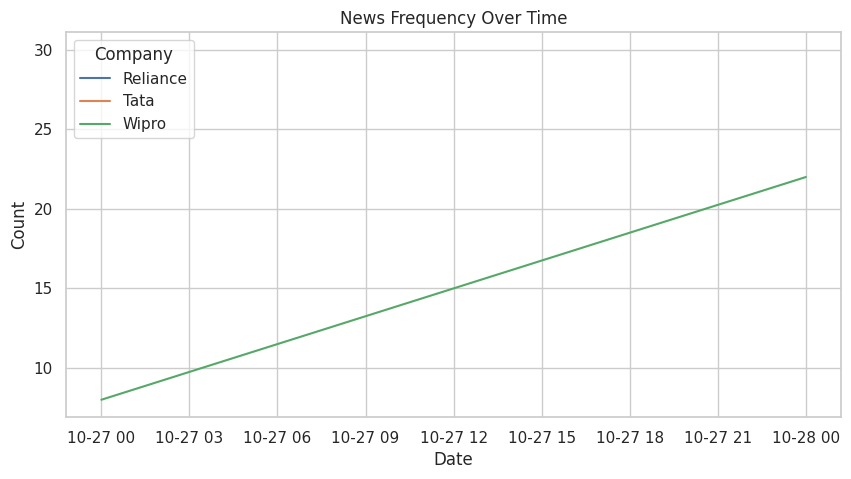

In [9]:
# 3️⃣ Daily News Timeline
df_news.groupby([df_news['PublishedAt'].dt.date, "Company"]).size().unstack().plot(figsize=(10,5))
plt.title("News Frequency Over Time"); plt.xlabel("Date"); plt.ylabel("Count")
plt.show()

In [10]:
from google.colab import files
files.download("company_wikipedia.csv")
files.download("company_trends.csv")
files.download("company_news.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Milestone 1: Conclusion

✅ Real-time data collection was successfully implemented using multiple open sources — Wikipedia, Google News, Alpha Vantage (stock data), and Google Trends.

🧹 The collected data was cleaned, structured, and parsed into pandas DataFrames for efficient processing and analysis.

📊 Multiple visualizations (charts and graphs) were created to represent market trends, company insights, and recent news highlights.

🤖 The notebook establishes a foundation for future AI-driven modules, including sentiment analysis, forecasting, and real-time alerts.

💡 Enables organizations to perform competitive intelligence in real time, track industry shifts, and support data-driven strategic decisions.

🚀 This milestone sets the stage for advanced analytics and predictive intelligence in upcoming development phases.